In [1]:
# Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Sets

In [2]:
# DataSets 

ipl = pd.read_csv('ipl-matches.csv')   # 2008 to 2022
ball = pd.read_csv('deliveries.csv')   # 2008 to 2020

ipl.head()


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [198]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Questions

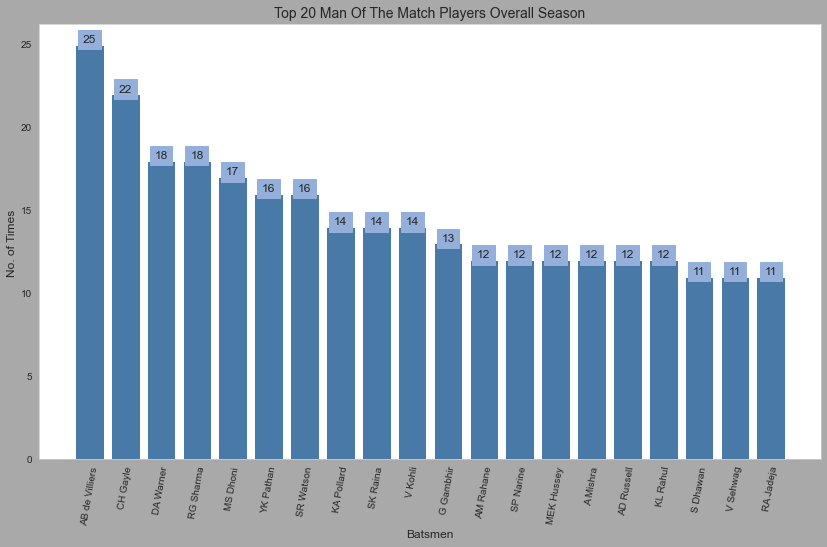

In [776]:
# Top 20 Man Of The Match Players Overall Season

# Used for Figure of the graph 
plt.figure(figsize=(14,8),facecolor='#A9A9A9')

# Count the Number of items and then initilized in a New variable
Man_of_the_Match = ipl['Player_of_Match'].value_counts().head(20)

# Convet Series into DataFrame by using reset_index method 
Temp_df = Man_of_the_Match.reset_index().rename(columns = {'index':'Player_of_Match','Player_of_Match':'No. of Times'})

# Plot the bar graph by using matplotlib library 
plt.bar(Temp_df['Player_of_Match'],Temp_df['No. of Times'],color = '#497AA7', width = 0.8) 

# Used for labels, title, and x_axis 
plt.xlabel('Batsmen',size=12)
plt.ylabel('No. of Times ',size=12)
plt.title('Top 20 Man Of The Match Players Overall Season',size=14)
plt.xticks(rotation=80)

plt.grid()

# Used for write down number on the bar charts
result = Temp_df['No. of Times']

for index,value in enumerate(result):
    plt.text(index,value,str(value),ha='center',va='bottom',backgroundcolor='#94B0DA',size=12)
    
plt.show()


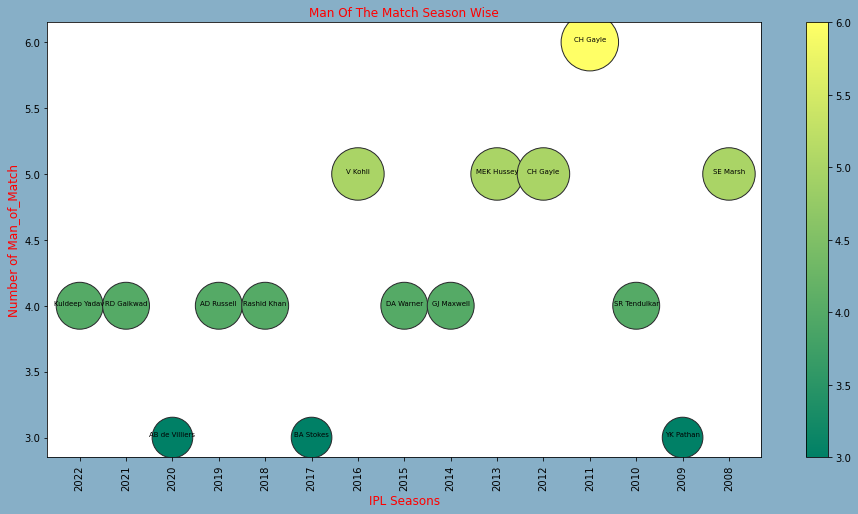

In [172]:
# Man Of The Match Season Wise

plt.figure(figsize=(16,8),facecolor='#87AFC7')

ipl = ipl.replace({'Season' : { '2020/21' : '2020', '2009/10' : '2010', '2007/08' : '2008' }})

ipl['No. of Times'] = 1


filtered_df = ipl.groupby(['Season','Player_of_Match'])['No. of Times'].count().reset_index()


MOM = filtered_df.sort_values(ascending=False,by=['Season','No. of Times']).drop_duplicates(subset='Season')


plt.scatter(MOM['Season'],MOM['No. of Times'],s=MOM['No. of Times']*550,
            c=MOM['No. of Times'],cmap='summer',edgecolor='#28282B',marker='o')


plt.xlabel('IPL Seasons',color='Red',size = 12)
plt.ylabel('Number of Man_of_Match',color='Red',size = 12)
plt.title('Man Of The Match Season Wise',color='Red',size = 12)
plt.colorbar()
plt.xticks(rotation=90)


# Name of the Players on Points
names = MOM['Player_of_Match']

for index, value in enumerate(names):
    plt.text(MOM['Season'].iloc[index], MOM['No. of Times'].iloc[index], str(value),
             ha='center', va='bottom', fontsize=7, color='black')



plt.show()


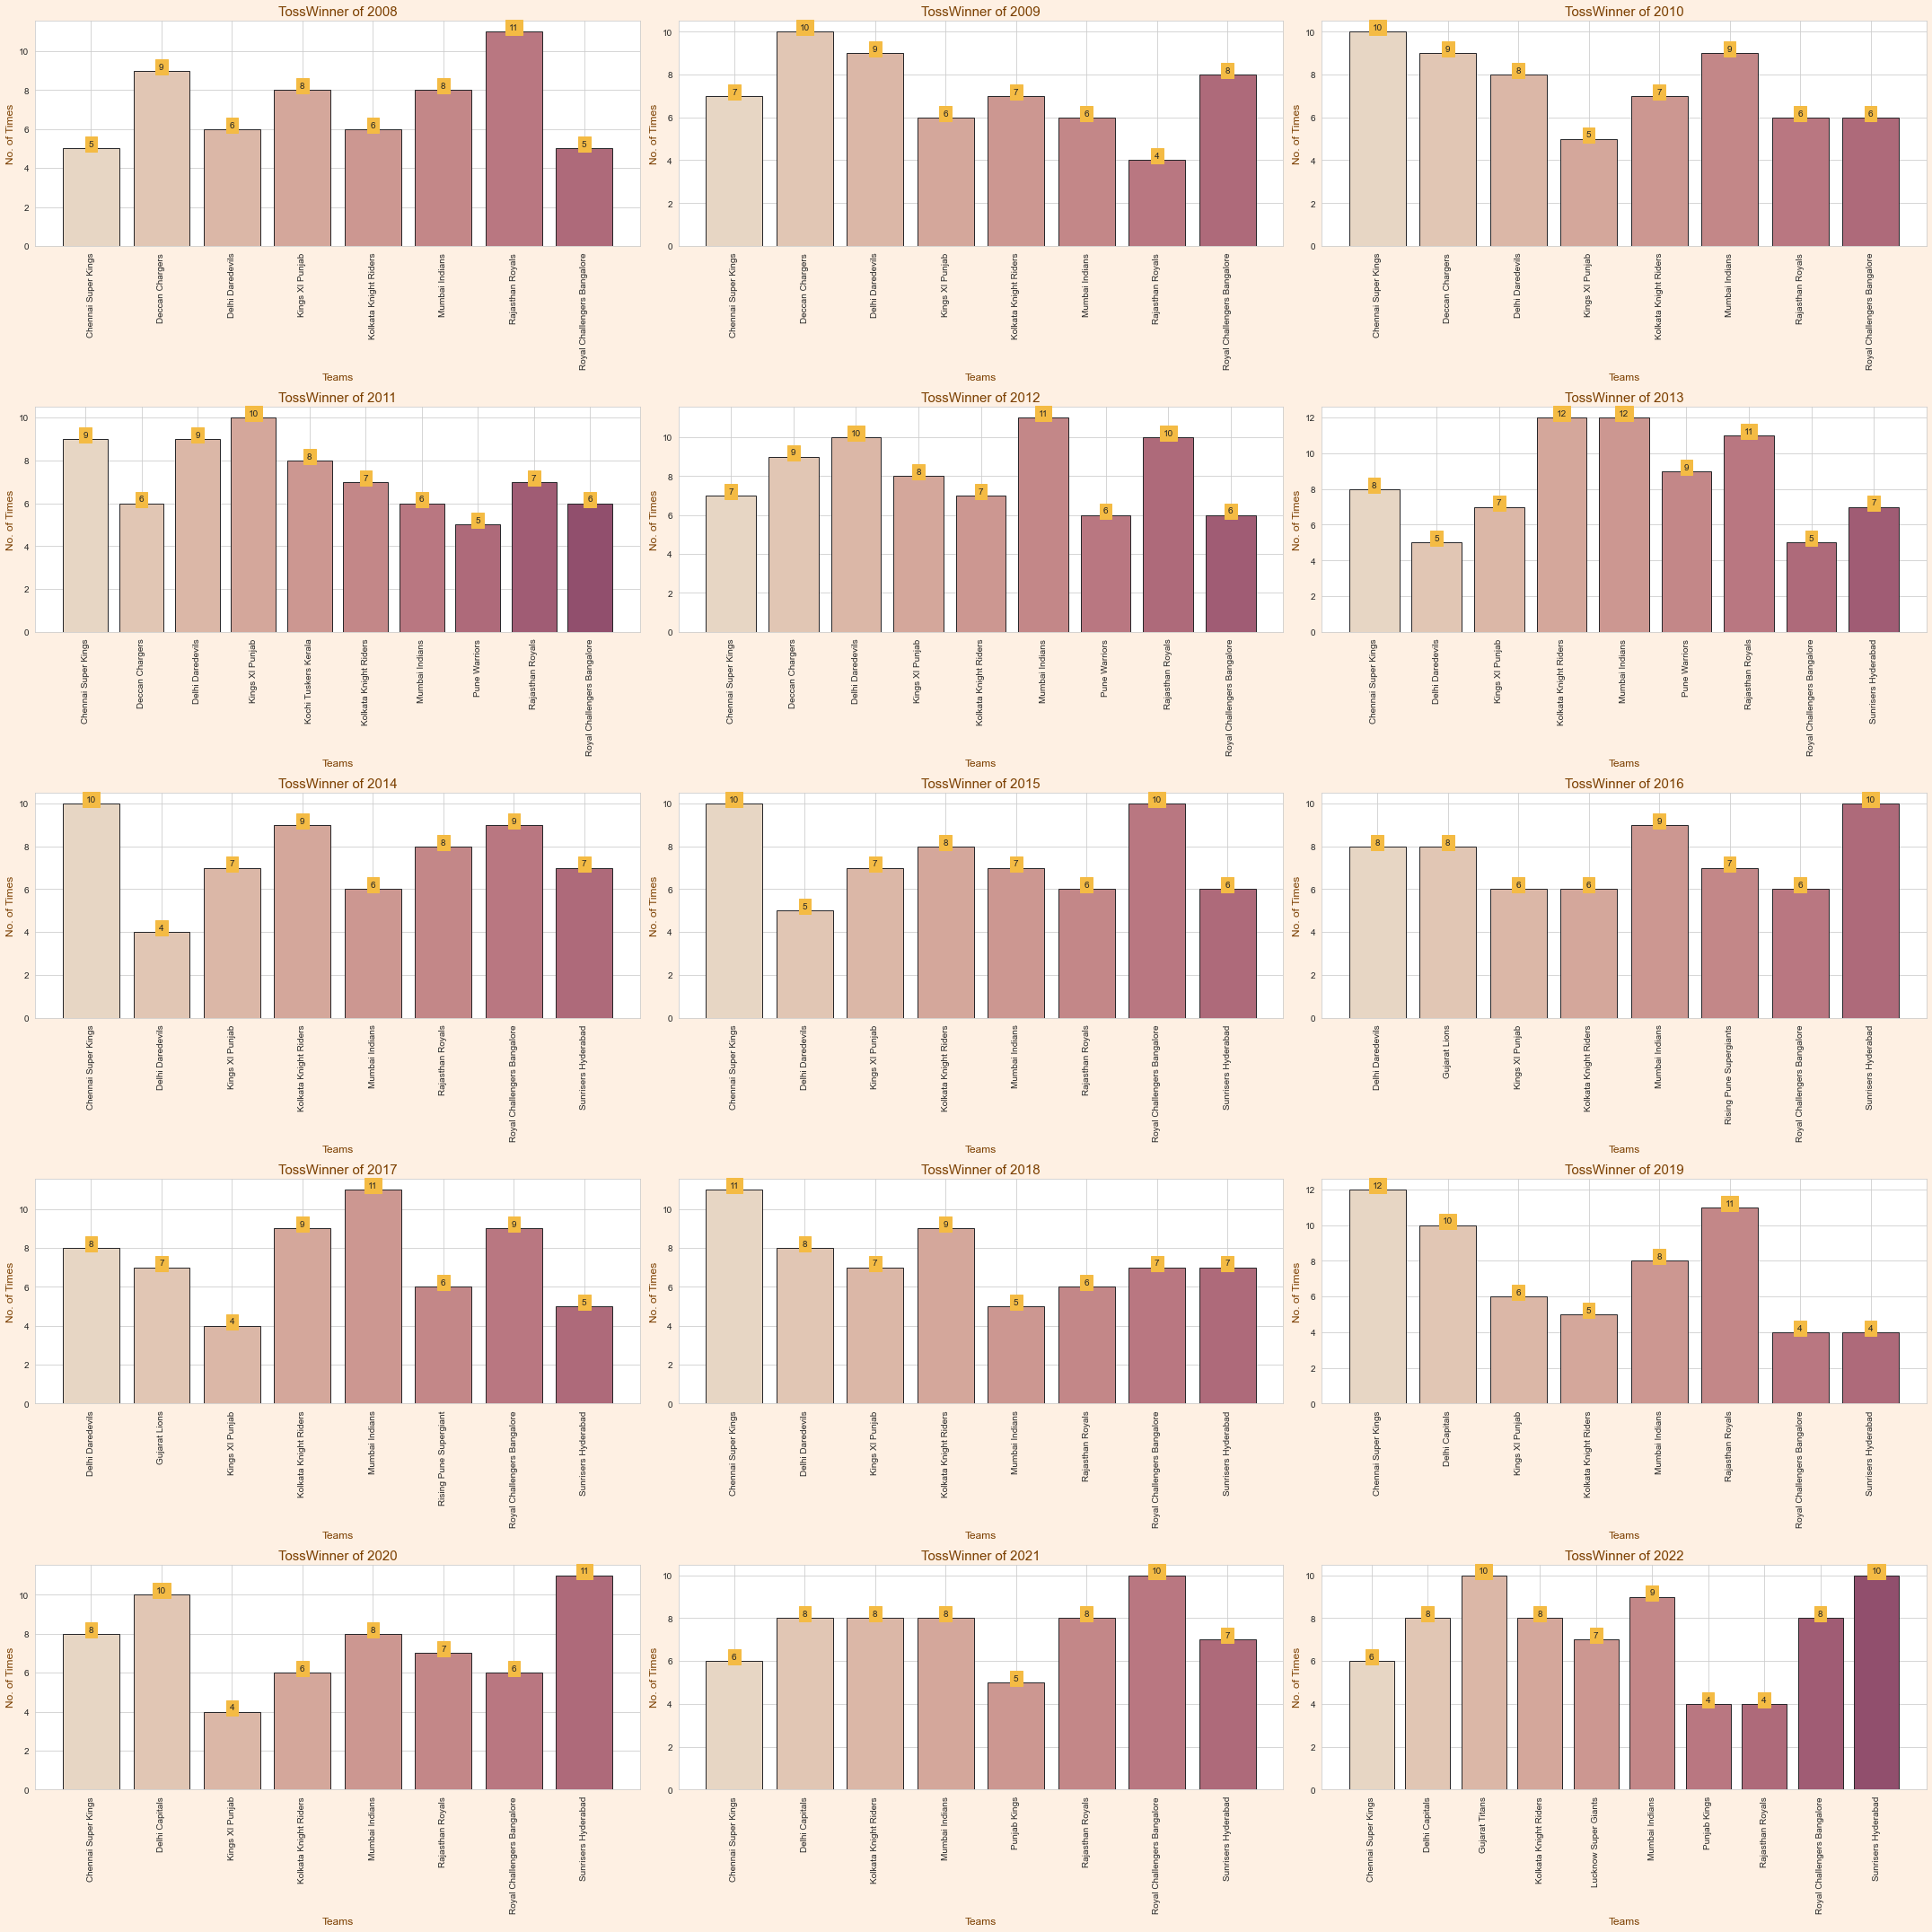

In [715]:
# Season Wise Toss Winner

# Change the size of the graphs
plt.figure(figsize=(30,30),facecolor='#FEF0E3')

SWTW = ipl.groupby(['Season', 'TossWinner'])['No. of Times'].count().reset_index()


# Separate Toss Winner's Season Wise
seasons = SWTW['Season'].unique()

# Set Color
colors = sns.color_palette("ch:start=.2", len(seasons))


# Create subplots
for i, season in enumerate(seasons, start=1): 
    plt.subplot(5, 3, i)
    
    season_data = SWTW[SWTW['Season'] == season]
    
    plt.bar(season_data['TossWinner'], season_data['No. of Times'],color=colors,edgecolor='#28282B')
    
    # TEXT on Bar Graph
    counts = season_data['No. of Times']
    for index, value in enumerate(counts):
        plt.text(index, value, str(value), ha='center', va='bottom',backgroundcolor='#F4BB44')
    
    # Set labels and title on the Graph
    plt.title(f'TossWinner of {season}',color='#7B3F00',size=15)
    plt.xlabel('Teams',color='#7B3F00',size=12)
    plt.ylabel('No. of Times',color='#7B3F00',size=12)
    plt.xticks(rotation=90)
    

plt.tight_layout()
plt.show()


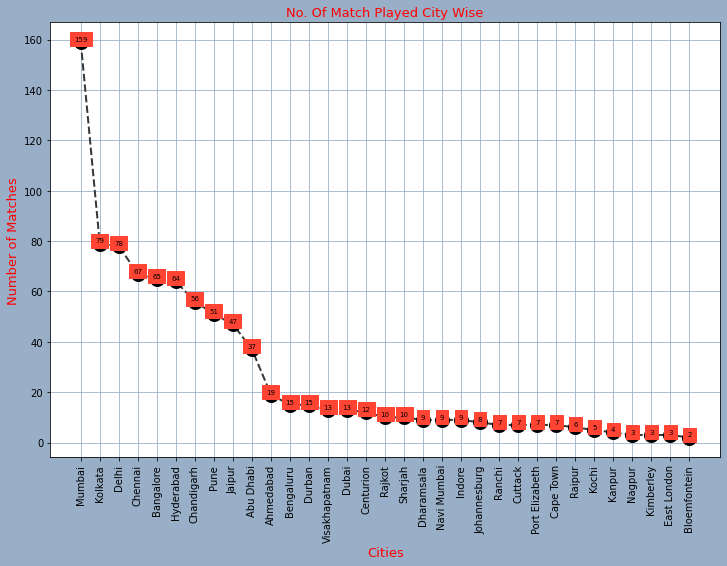

In [1081]:
# No. Of Match Played In City Wise

plt.figure(figsize=(12,8),facecolor='#98AFC7')

City_Matches = ipl['City'].value_counts().reset_index().rename(columns = {'index':'Cities','City':'Numbers'})


plt.plot(City_Matches['Cities'],City_Matches['Numbers'],color='#353935',linewidth=2,linestyle='--',
         marker='o',markeredgecolor='#000000',markersize=10,markeredgewidth=5)

plt.xticks(rotation=90)
plt.xlabel('Cities',color='Red',size=13)
plt.ylabel('Number of Matches',color='Red',size=13)
plt.title('No. Of Match Played City Wise',color='Red',size=13)
plt.grid(color='#98AFC7')


# Values on marker
num = City_Matches['Numbers']

for index,value in enumerate(num):
    plt.text(index,value,str(value),ha='center',va='bottom',size=7,backgroundcolor='#FF4433')

plt.show()


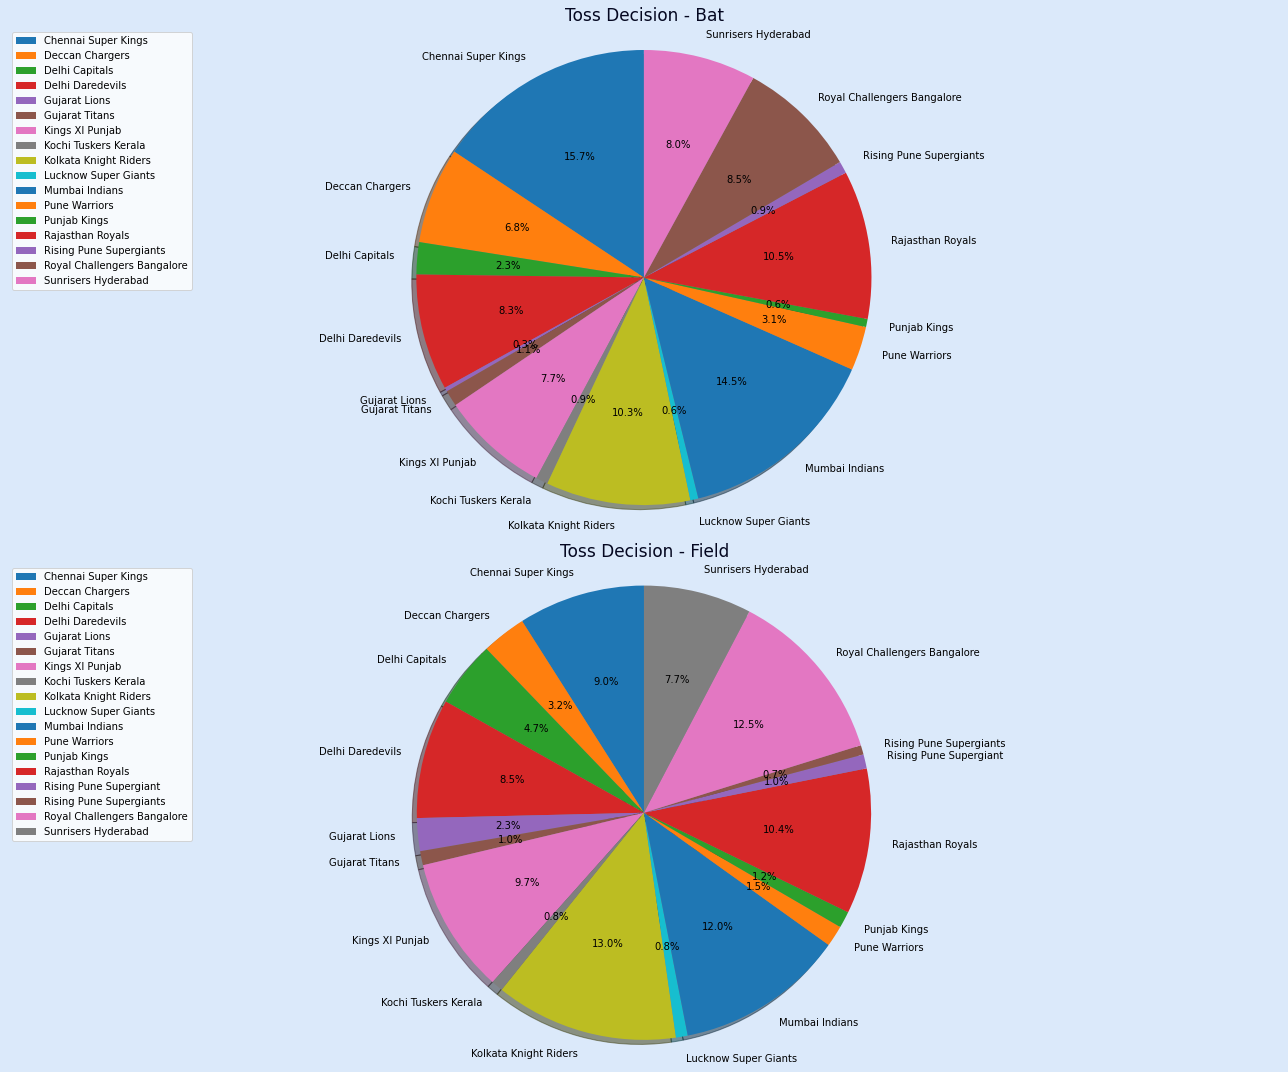

In [173]:
# Toss Winner Decision

filtered_data = ipl[['TossWinner', 'TossDecision']].value_counts().groupby(['TossWinner', 'TossDecision']).sum().reset_index()

# Separate data for 'Bat' and 'Field' decisions
bat_decisions = filtered_data[filtered_data['TossDecision'] == 'bat']
field_decisions = filtered_data[filtered_data['TossDecision'] == 'field']


# Function to create pie chart
def create_pie_chart(data, decision_type):
    labels = data['TossWinner']
    No_of_Times = data[0]     # Fetch [0] Column from the DataFrame and assigned into new_variable
    plt.pie(No_of_Times, labels=labels, autopct='%1.1f%%', startangle=90,shadow=True)
    plt.axis('equal')         # Equal aspect ratio ensures the pie chart is circular
    plt.title(f'Toss Decision - {decision_type}',size=17,color='#040720')
    plt.legend(loc='upper left')

    
# Create separate pie charts for 'Bat' and 'Field' decisions
plt.figure(figsize=(18, 15),facecolor='#DBE9FA')

# Pie Chart for Bat
plt.subplot(2, 1, 1)
create_pie_chart(bat_decisions, 'Bat')

# Pie Chart for Field
plt.subplot(2, 1, 2)
create_pie_chart(field_decisions, 'Field')

plt.tight_layout()
plt.show()


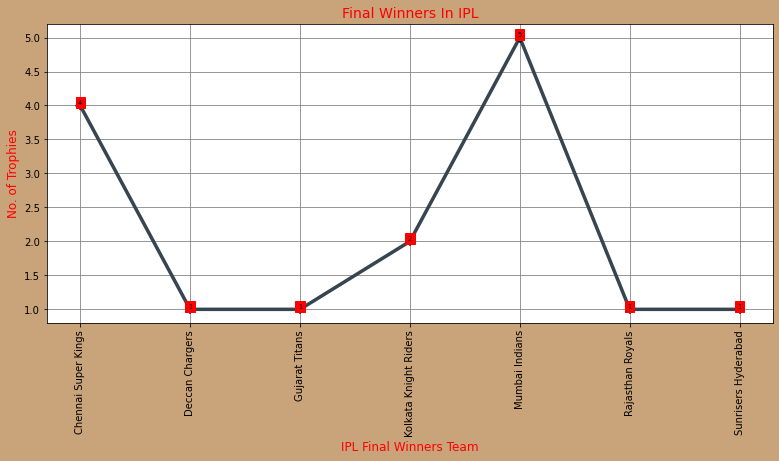

In [1255]:
# Final Winners In IPL

plt.figure(figsize=(13,5.5),facecolor='#C9A379')

filtered_data = ipl[ipl['MatchNumber'] == 'Final'].groupby('WinningTeam')['No. of Times'].sum()

Final_Winners = filtered_data.reset_index()

plt.plot(Final_Winners['WinningTeam'],Final_Winners['No. of Times'],color='#36454F',linewidth=3.5,
         marker='*',markeredgecolor='#000000',markeredgewidth=6)

plt.xlabel('IPL Final Winners Team',color='red',size=12)
plt.ylabel('No. of Trophies',color='red',size=12)
plt.title('Final Winners In IPL',color='red',size=14)
plt.xticks(rotation=90)


# Value on points
num = Final_Winners['No. of Times']

for index,value in enumerate(num):
    plt.text(index,value,str(value),ha='center',va='bottom',backgroundcolor='red',size=6.5)

plt.grid(color='grey')
plt.show()


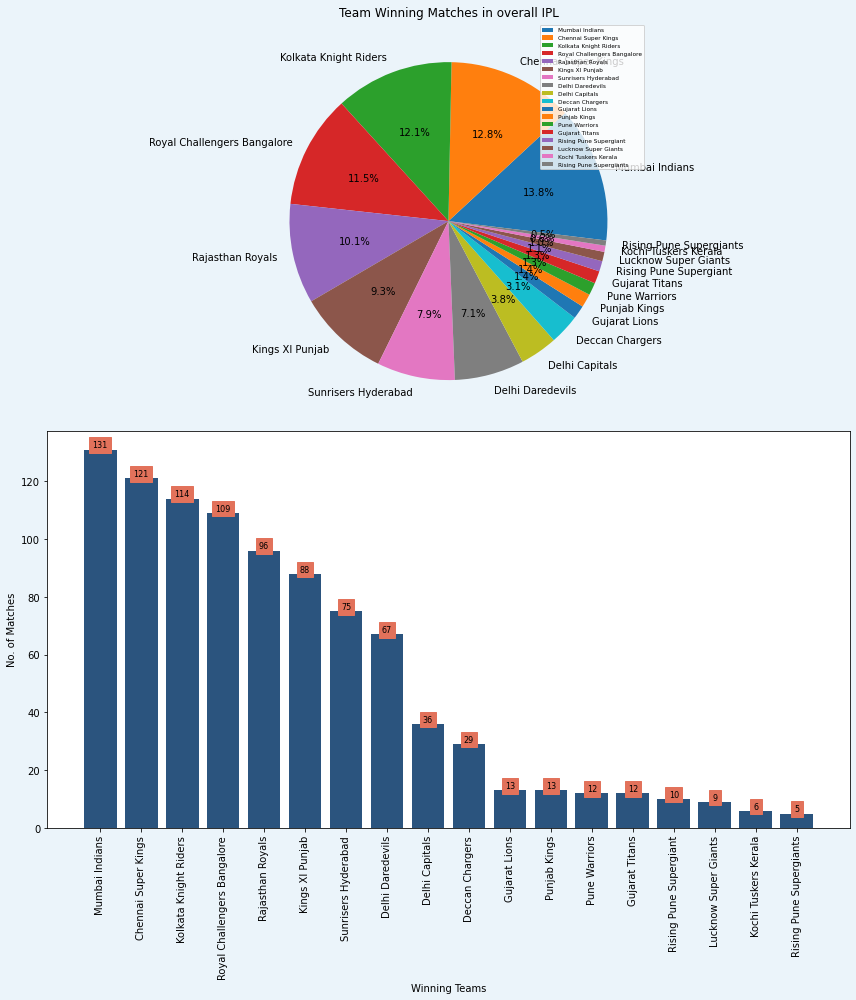

In [175]:
# Most Winning Matches Team Wise  (T_W_M) -> Team_Winning_Matches

plt.figure(figsize=(12,14),facecolor='#EBF4FA')

Filtered_Data = ipl['WinningTeam'].value_counts().reset_index()


T_W_M = Filtered_Data.rename(columns = {'index':'WinningTeam','WinningTeam':'No. of times'})

def pie_chart(data):
    
    labels = data['WinningTeam']
    sizes = data['No. of times']
    plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=-7)
    plt.title('Team Winning Matches in overall IPL')
    plt.legend(fontsize=5.75,loc='upper right')
    

# First Chart
plt.subplot(2,1,1)
pie_chart(T_W_M)


# Second Chart [Bar]
plt.subplot(2,1,2)
plt.bar(T_W_M['WinningTeam'],T_W_M['No. of times'],color='#2B547E')
plt.xlabel('Winning Teams')
plt.ylabel('No. of Matches')
plt.xticks(rotation=90)

# Text on Bar Chart
counts = T_W_M['No. of times']
for index,value in enumerate(counts):
    plt.text(index,value,str(value),ha='center',va='bottom',backgroundcolor='#e2725b',size=8)
    

plt.tight_layout()
plt.show()



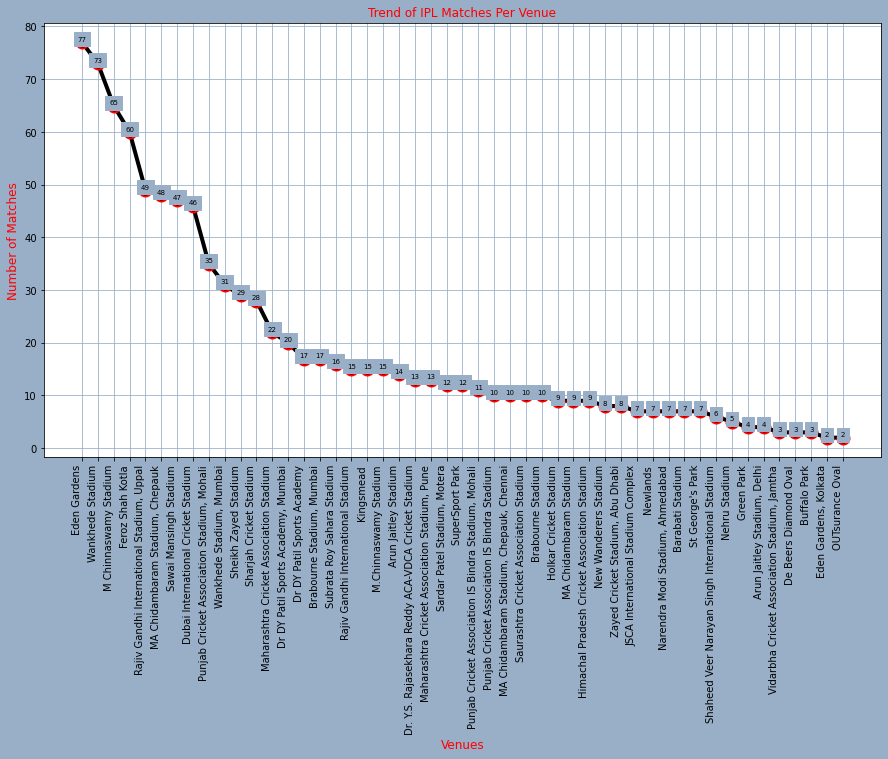

In [656]:
# Highest IPL Matches As Per The Ground   (M_P_G) -> Matches_Per_Ground 


M_P_G = ipl['Venue'].value_counts().reset_index().rename(columns={'index': 'Venue', 'Venue': 'Numbers'})

plt.figure(figsize=(15, 8), facecolor='#98AFC7')

# Sorting the data for better visualization
M_P_G = M_P_G.sort_values(by='Numbers', ascending=False)

plt.plot(M_P_G['Venue'], M_P_G['Numbers'], marker='o', linestyle='-',linewidth=4, color='black',
         markersize=12,markeredgecolor='red',markeredgewidth=2)


plt.xlabel('Venues',color='red',fontsize=12,loc='center')
plt.ylabel('Number of Matches',color='red',fontsize=12)
plt.title('Trend of IPL Matches Per Venue',color='red')


# Text on Markers
num = M_P_G['Numbers']
for index,value in enumerate(num):
    plt.text(index,value,str(value),ha='center',va='bottom',size=7,backgroundcolor='#98AFC7')


# Rotating x-axis labels for better readability
plt.xticks(rotation=90, ha='right')


plt.grid(True,color='#98AFC7')
plt.show()



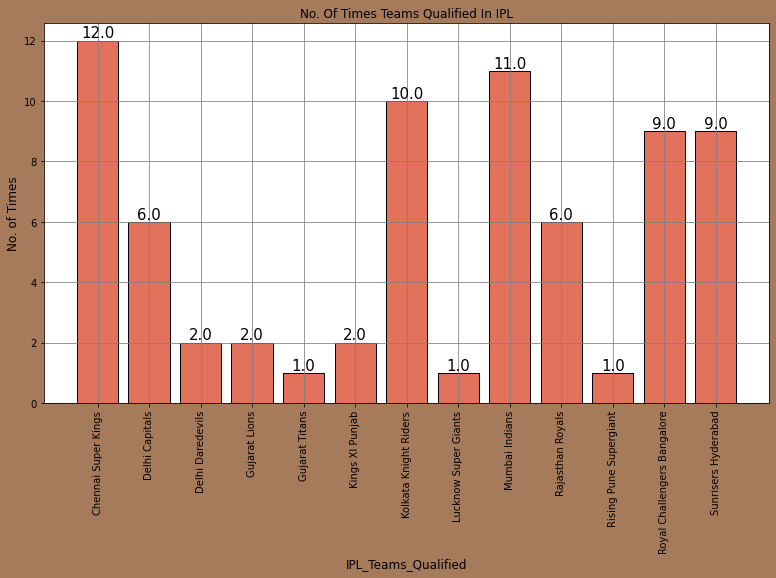

In [1296]:
# No. Of Times Teams Qualified In IPL

plt.figure(figsize=(13,7),facecolor='#A67B5B')

Qualifiers = ipl[(ipl['MatchNumber'] == 'Qualifier 1') | 
                 (ipl['MatchNumber'] == 'Qualifier 2') | 
                 (ipl['MatchNumber'] == 'Qualifier') |
                 (ipl['MatchNumber'] == 'Elimination Final') |
                 (ipl['MatchNumber'] == 'Eliminator') ]

Team_Qualifier_1 = Qualifiers['Team1'].value_counts()
Team_Qualifier_2 = Qualifiers['Team2'].value_counts()

Team_Qualifier_1

Total_Teams_Qualified = Team_Qualifier_1.add(Team_Qualifier_2,fill_value=0).reset_index().rename(columns = {'index':'Teams'})

plt.bar(Total_Teams_Qualified['Teams'],Total_Teams_Qualified[0],color='#e2725b',edgecolor='black')


# Labels, Title and grid 
plt.title('No. Of Times Teams Qualified In IPL',color='black',size=12)
plt.xlabel('IPL_Teams_Qualified',color='black',size=12)
plt.ylabel('No. of Times',color='black',size=12)
plt.xticks(rotation=90)
plt.grid(color='grey')


# Values on bars
Times = Total_Teams_Qualified[0]

for index,value in enumerate(Times):
    plt.text(index,value,str(value),ha='center',va='bottom',size=15)


plt.show()



In [1321]:
# One Team Defeated Others Team By Max Run Margins


Won_By_Runs = ipl[ipl['WonBy'] == 'Runs']

Teams = Won_By_Runs.groupby(['Team1','Team2'])



for group,data in Teams:
    Run_Margins = pd.DataFrame(Teams['Margin'].max())
    
    
print(Run_Margins.iloc[0:11].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[11:19].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[20:27].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[28:37].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[38:39].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[40:43].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[44:52].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[53:55].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[56:66].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[67:71].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[72:83].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[84:91].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[92:96].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[97:108].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[109:112].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[113:126].sort_values(by='Margin',ascending=False).astype('int16'),'\n')
print(Run_Margins.iloc[127:].sort_values(by='Margin',ascending=False).astype('int16'),'\n')



                                                 Margin
Team1               Team2                              
Chennai Super Kings Kings XI Punjab                  97
                    Delhi Daredevils                 93
                    Delhi Capitals                   91
                    Deccan Chargers                  78
                    Royal Challengers Bangalore      69
                    Rajasthan Royals                 64
                    Mumbai Indians                   48
                    Sunrisers Hyderabad              45
                    Kolkata Knight Riders            34
                    Pune Warriors                    25
                    Kochi Tuskers Kerala             11 

                                             Margin
Team1           Team2                              
Deccan Chargers Chennai Super Kings              74
                Rajasthan Royals                 53
                Mumbai Indians                   41
          

<Figure size 432x288 with 0 Axes>

Enter batsman name: CH Gayle


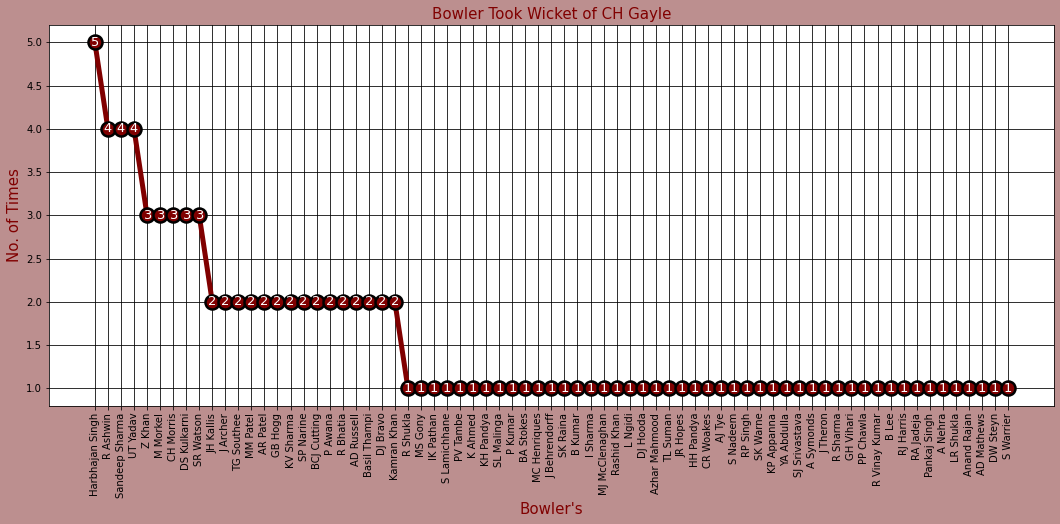

In [657]:
# Which Bowler Took Highest Wicket Of Specific Player

plt.figure(figsize=(18,7),facecolor='#BC8F8F')

# Function Creation
def player_dismissed(batsman_name):
    
    Batsman_DF = ball[ball['batsman'] == batsman_name]
    
    Batsman_Dismissed = Batsman_DF[Batsman_DF['player_dismissed'] == batsman_name]['bowler'].value_counts().reset_index()
    
    Batsman_Dismissed = Batsman_Dismissed.rename(columns = {'index':'Bowler','bowler':'No. of Times'})
    
    plt.plot(Batsman_Dismissed['Bowler'],Batsman_Dismissed['No. of Times'],color='#800000'
                     ,linewidth=5,marker='o',markersize=14,markeredgecolor='black',markeredgewidth=2.5)
    
    # Value's on markers
    for index,value in enumerate(Batsman_Dismissed['No. of Times']):
        plt.text(index,value,str(value),ha='center',va='center',size=13,color='white')
        
    # Title, Label's and grid
    plt.title(f"Bowler Took Wicket of {batsman_name}",color='#800000',size=15)
    plt.xlabel("Bowler's",color='#800000',size=15)
    plt.ylabel('No. of Times',color='#800000',size=15)
    plt.grid(color='#000000')
    plt.xticks(rotation=90)
        
# User Input 
Batsman_name = input('Enter batsman name: ')

# Function Calling
player_dismissed(Batsman_name)

plt.show()


In [104]:
# Highest Scores By The Specific Player 

def highest_score(batsman_name):
    
    Player = ball[ball['batsman'] == batsman_name]
    Highest_Score = Player.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]
    return Highest_Score
    

# Input user
Batsman_name = 'CH Gayle'
# Batsman_name = input('Enter the Batsman Name: ')

# Function Calling
highest_score(Batsman_name)


Enter the Batsman Name: CH Gayle


175

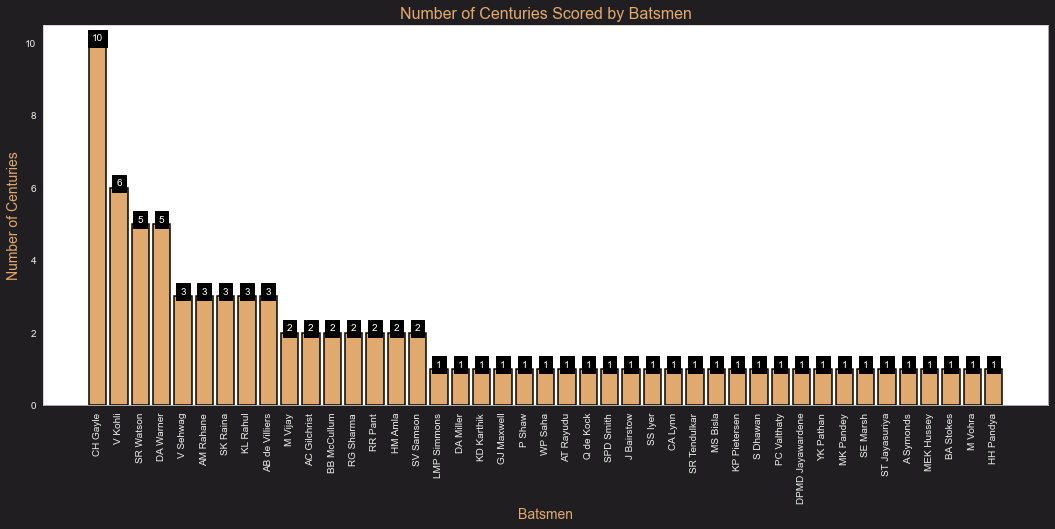

In [934]:
# How Many Matches Did A Batsman Score A Century (or more)

plt.figure(figsize=(18,7),facecolor='#201E20')

filtered_df = ball.groupby(['match_id','batsman'])['total_runs'].sum().reset_index()

Batsman_Centuries = filtered_df[filtered_df['total_runs'] >= 100]

final_dataset = Batsman_Centuries['batsman'].value_counts().reset_index().rename(columns={'index':'batsman','batsman':'Times'})

plt.bar(final_dataset['batsman'],final_dataset['Times'],color='#E0A96D',edgecolor='black',linewidth=1.5)


# Customize x-axis and y-axis color
plt.tick_params(axis='x', colors='#EAEEE9',width=2)  
plt.tick_params(axis='y', colors='#EAEEE9')


# Lables, title, and Grid
plt.xlabel('Batsmen',color='#E0A96D',size=14)
plt.ylabel('Number of Centuries',color='#E0A96D',size=14)
plt.title('Number of Centuries Scored by Batsmen',color='#E0A96D',size=16)
plt.grid()
plt.xticks(rotation = 90)


# Values on bar charts
Num = final_dataset['Times']
for index,value in enumerate(Num):
    plt.text(index,value,str(value),ha='center',va='bottom',backgroundcolor='black',color='white')

plt.show()


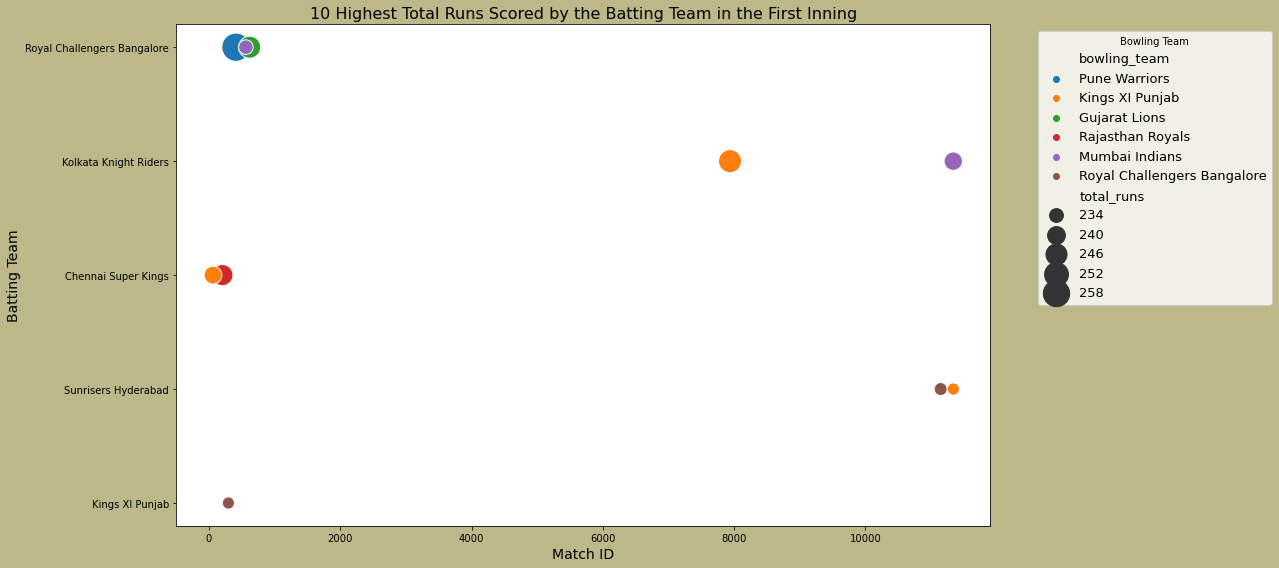

In [182]:
# 10 Highest Total Number Of Runs Scored By The Batting Team In The First Inning 

plt.figure(figsize=(18, 8),facecolor='#BCB88A')

Data_Filtered = ball[ball['inning'] == 1].groupby(['match_id', 'batting_team', 'bowling_team'])['total_runs'].sum()

Ten_Highest_Scores = Data_Filtered.reset_index().sort_values(ascending=False, by='total_runs').head(10)

# Seaborn Bubble Chart
sns.scatterplot(data=Ten_Highest_Scores, x='match_id', y='batting_team', size='total_runs',
                hue='bowling_team', sizes=(150, 800))

# Customize the plot
plt.title('10 Highest Total Runs Scored by the Batting Team in the First Inning', size=16)
plt.xlabel('Match ID', size=14)
plt.ylabel('Batting Team', size=14)
plt.legend(title='Bowling Team', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13)


plt.tight_layout()
plt.show()


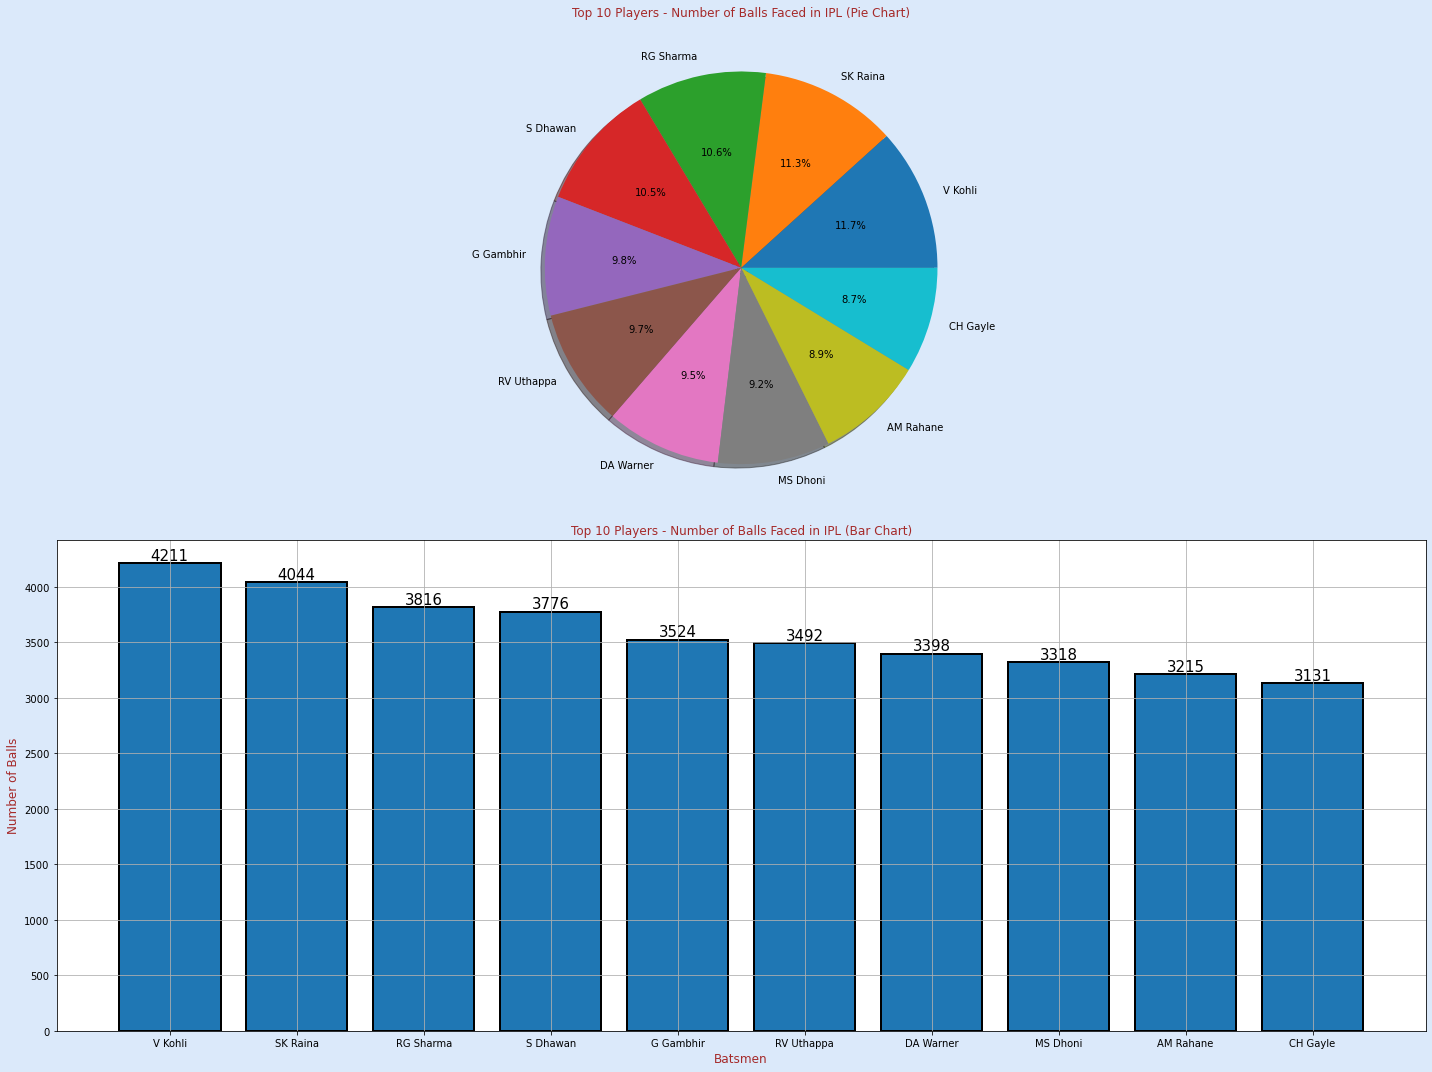

In [510]:
# 10 Players Who Faced The Most Number Of Balls In The Entire IPL

plt.figure(figsize=(20, 15),facecolor='#DBE9FA')

ball['No. of Balls'] = 1

Ball_Faced = ball.groupby('batsman')['No. of Balls'].sum().sort_values(ascending=False).reset_index().head(10)

labels = Ball_Faced['batsman']


# Subplot 1: Pie chart
plt.subplot(2, 1, 1)
plt.pie(Ball_Faced['No. of Balls'], labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Top 10 Players - Number of Balls Faced in IPL (Pie Chart)', color='brown', size=12)

# Subplot 2: Bar chart
plt.subplot(2, 1, 2)
plt.bar(Ball_Faced['batsman'], Ball_Faced['No. of Balls'],edgecolor='black',linewidth=2)
plt.title('Top 10 Players - Number of Balls Faced in IPL (Bar Chart)', color='brown', size=12)
plt.xlabel('Batsmen',color='brown',size=12)
plt.ylabel('Number of Balls',color='brown',size=12)
plt.grid()


# Text on bar Chart
Num_of_Balls = Ball_Faced['No. of Balls']
for index,value in enumerate(Num_of_Balls):
    plt.text(index,value,str(value),ha='center',va='bottom',size=15)
    
    
plt.tight_layout()  # Adjust layout for better spacing

plt.show()


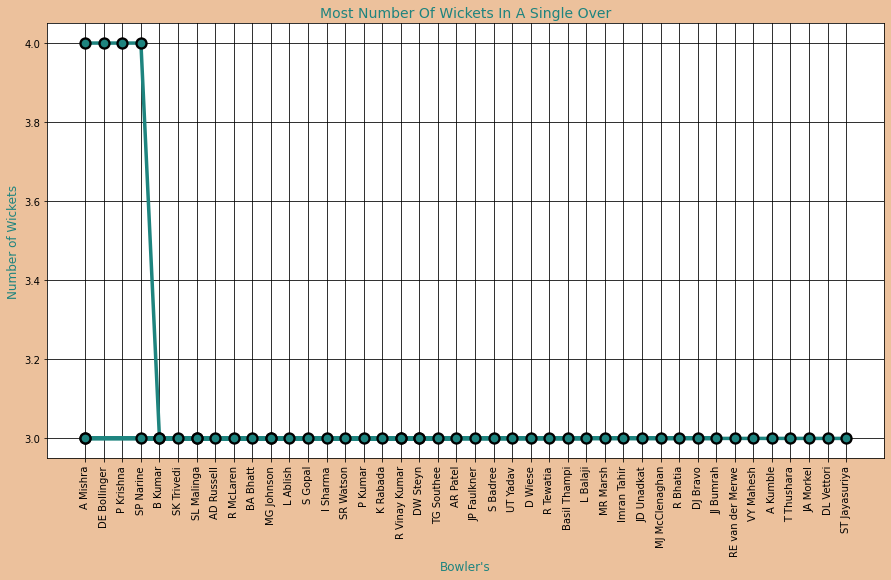

In [660]:
# Bowler Has Taken The Most Number Of Wickets In A Single Over In Any Match

plt.figure(figsize=(15,8),facecolor='#ecc19c')

# Create a new column 'wicket' based on 'player_dismissed'
ball['wicket'] = ball['player_dismissed'].apply(lambda x: 0 if pd.isnull(x) else 1)

Filtered_Data = ball.groupby(['match_id','inning','over','bowler'])['wicket'].sum().reset_index()

Most_Wicket = Filtered_Data.sort_values(ascending=False,by='wicket').head(50)

plt.plot(Most_Wicket['bowler'],Most_Wicket['wicket'],linewidth=3.5,color='#1e847f',
         marker='o',markersize=10,markeredgecolor='#000000',markeredgewidth=2.3)

plt.title('Most Number Of Wickets In A Single Over',color='#1e847f',size=14)
plt.xlabel("Bowler's",color='#1e847f',size=12)
plt.ylabel('Number of Wickets',color='#1e847f',size=12)
plt.xticks(rotation=90)
plt.grid(color='black')

plt.show()


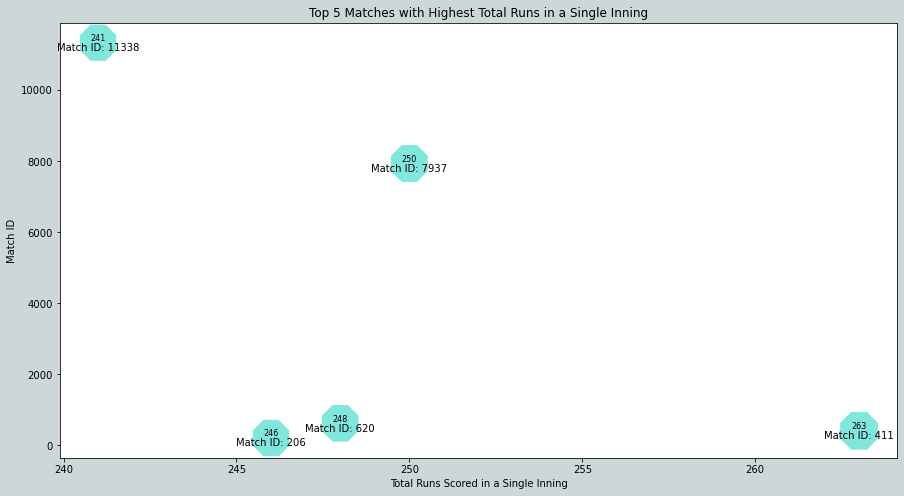

In [671]:
# Match_id Where The 5 Highest Total Runs Were Scored In A Single Inning.

temp_df = ball.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

Filtered_Data = temp_df.sort_values(ascending=False,by='total_runs').head(5)

Highest_Total = Filtered_Data[['batting_team','match_id','total_runs']]

plt.figure(figsize=(15,8),facecolor='#ced7d8')

plt.scatter(Highest_Total['total_runs'],Highest_Total['match_id'],s=Highest_Total['total_runs']*6,
           marker='8',color='#7fe7dc')

# Add labels to points
for i, txt in enumerate(Highest_Total['total_runs']):
    plt.text(Highest_Total['total_runs'].iloc[i], Highest_Total['match_id'].iloc[i], txt, fontsize=8, ha='center',va='bottom')
    
    plt.text(Highest_Total['total_runs'].iloc[i], Highest_Total['match_id'].iloc[i] - 1,
             f"Match ID: {Highest_Total['match_id'].iloc[i]}", fontsize=10, ha='center', va='top', color='black')
    
# Set labels and title?
plt.xlabel('Total Runs Scored in a Single Inning')
plt.ylabel('Match ID')
plt.title('Top 5 Matches with Highest Total Runs in a Single Inning')

plt.show()


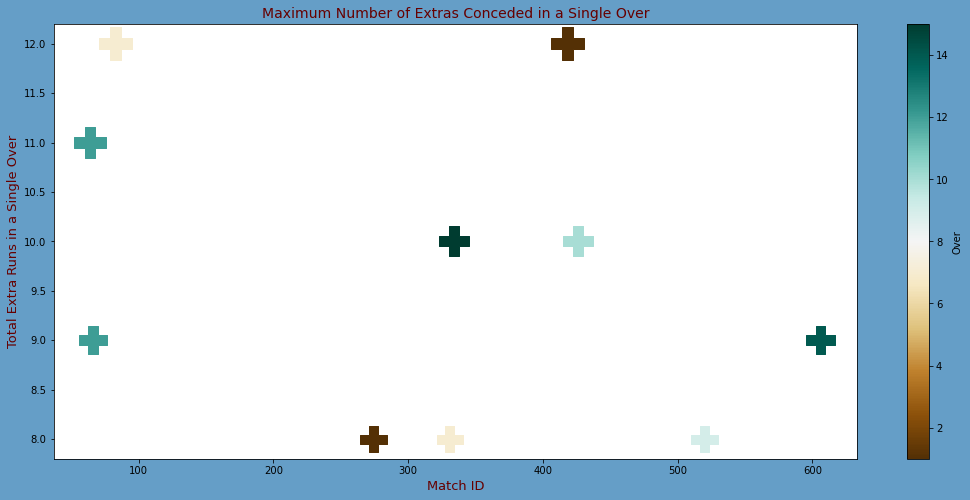

In [604]:
# 10 Maximum Number Of Extras (byes, leg byes, no balls, etc.) conceded in a single over

Max_Extra_Runs = ball.groupby(['match_id', 'inning', 'over'])['extra_runs'].sum().sort_values(ascending=False).reset_index().head(10)

# Create a scatter plot
plt.figure(figsize=(18, 8),facecolor='#659EC7')
plt.scatter(Max_Extra_Runs['match_id'], Max_Extra_Runs['extra_runs'], c=Max_Extra_Runs['over'],
            cmap='BrBG', marker='P', alpha=1,s=Max_Extra_Runs['extra_runs']*90)

# Set labels and title
plt.xlabel('Match ID',size=13,color='#660000')
plt.ylabel('Total Extra Runs in a Single Over',size=13,color='#660000')
plt.title('Maximum Number of Extras Conceded in a Single Over',size=14,color='#660000')

# Add color bar
cbar = plt.colorbar()
cbar.set_label('Over')

# Show the scatter plot
plt.show()


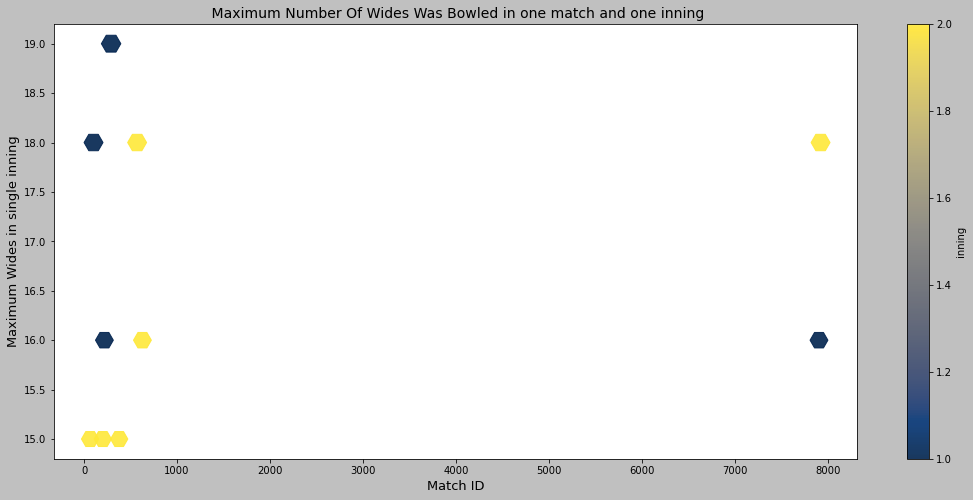

In [567]:
# 10 Match_id Where The Maximum Number Of Wides Was Bowled in one match and one inning

Data_Filtered = ball[ball['wide_runs'] != 0].groupby(['match_id','inning'])['wide_runs'].sum().reset_index()

Max_Wides = Data_Filtered.sort_values(ascending=False,by='wide_runs').head(10)

# Create Scatter plot
plt.figure(figsize=(18,8),facecolor='#C0C0C0')
plt.scatter(Max_Wides['match_id'],Max_Wides['wide_runs'],cmap='cividis',alpha=0.9,
            s=Max_Wides['wide_runs']*20,marker='H',c=Max_Wides['inning'])

# Add color bar
cbar = plt.colorbar()
cbar.set_label('inning')

# Set labels and title
plt.xlabel('Match ID',size=13,color='#000000')
plt.ylabel('Maximum Wides in single inning',size=13,color='#000000')
plt.title(' Maximum Number Of Wides Was Bowled in one match and one inning',size=14,color='#000000')

plt.show()


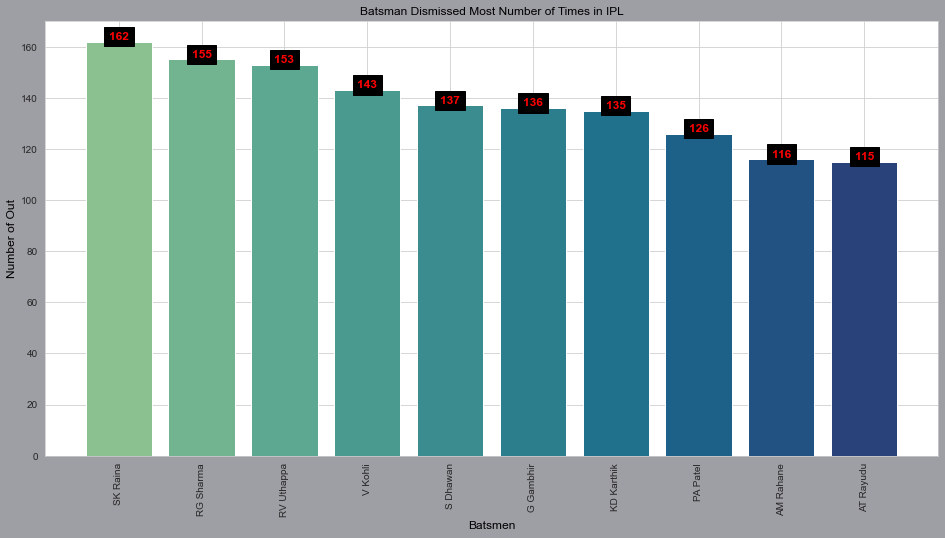

In [777]:
# Identify The Batsman Who Has Been Dismissed The Most Number Of Times In The Dataset.

plt.figure(figsize=(16,8),facecolor='#9E9FA5')

# Set color 
colors = sns.color_palette("crest", len(Batsman_Dismissed))

Batsman_Dismissed = ball['player_dismissed'].value_counts().reset_index().rename(columns = {'index':'player_dismissed',
                                                                        'player_dismissed':'Number of Times'}).head(10)

Batsman_Dismissed

plt.bar(Batsman_Dismissed['player_dismissed'],Batsman_Dismissed['Number of Times'],color=colors)


# Value on Bar Chart
Times = Batsman_Dismissed['Number of Times']

for index,value in enumerate(Times):
    plt.text(index,value,str(value),ha='center',va='bottom',backgroundcolor='black',color='red',size=12,fontweight='bold')

plt.xlabel('Batsmen',color='black',size=12)
plt.ylabel('Number of Out',color='black',size=12)
plt.title('Batsman Dismissed Most Number of Times in IPL',color='black',size=12)
plt.xticks(rotation=90)

plt.show()


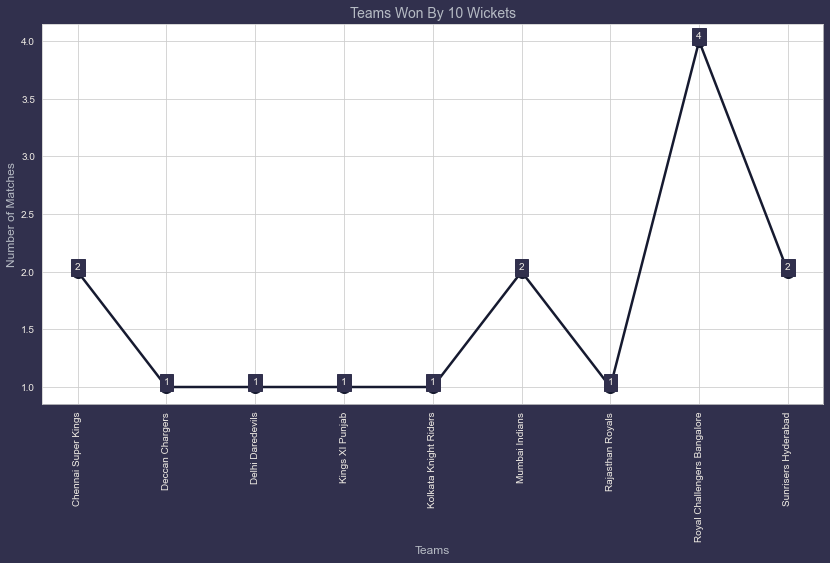

In [760]:
# Calculate The Total Number Of Matches In Which A Team Won Without Losing Single Wicket.

plt.figure(figsize=(14,7),facecolor='#31304D')

Filter_Data = ipl[ipl['WonBy'] == 'Wickets']

Won_By_Wickets = Filter_Data[Filter_Data['Margin'] == 10].groupby('WinningTeam').sum().reset_index()

plt.plot(Won_By_Wickets['WinningTeam'],Won_By_Wickets['No. of Times'],color='#161A30',linewidth=2.5,
        marker='o',markersize=12)

# Customize x-axis and y-axis color
plt.tick_params(axis='x', colors='#F0ECE5',width=2)  
plt.tick_params(axis='y', colors='#F0ECE5')

plt.title('Teams Won By 10 Wickets',color='#B6BBC4',size=14)
plt.xlabel('Teams',color='#B6BBC4',size=12)
plt.ylabel('Number of Matches',color='#B6BBC4',size=12)
plt.xticks(rotation=90)

# Value on Graph
num = Won_By_Wickets['No. of Times']
for index,value in enumerate(num):
    plt.text(index,value,str(value),backgroundcolor='#31304D',color='#F0ECE5',va='bottom',ha='center',size=10)

plt.show()

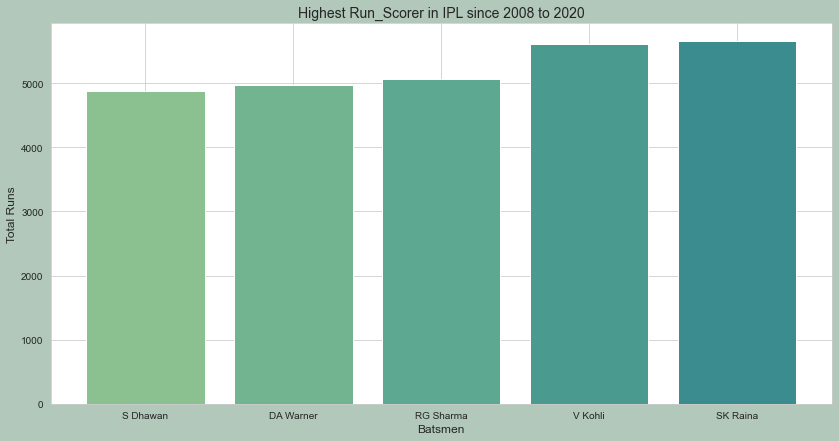

In [780]:
# Top 5 Highest Run_Scorer

Highest_Run_Scorer = ball.groupby('batsman')['total_runs'].sum().sort_values().tail(5).reset_index()

plt.figure(figsize=(14,7),facecolor='#B2C8BA')

Colors = sns.color_palette('rocket_r')

plt.bar(Highest_Run_Scorer['batsman'],Highest_Run_Scorer['total_runs'],color=colors)

plt.xlabel('Batsmen',size=12)
plt.ylabel('Total Runs',size=12)
plt.title('Highest Run_Scorer in IPL since 2008 to 2020',size=14)

plt.show()


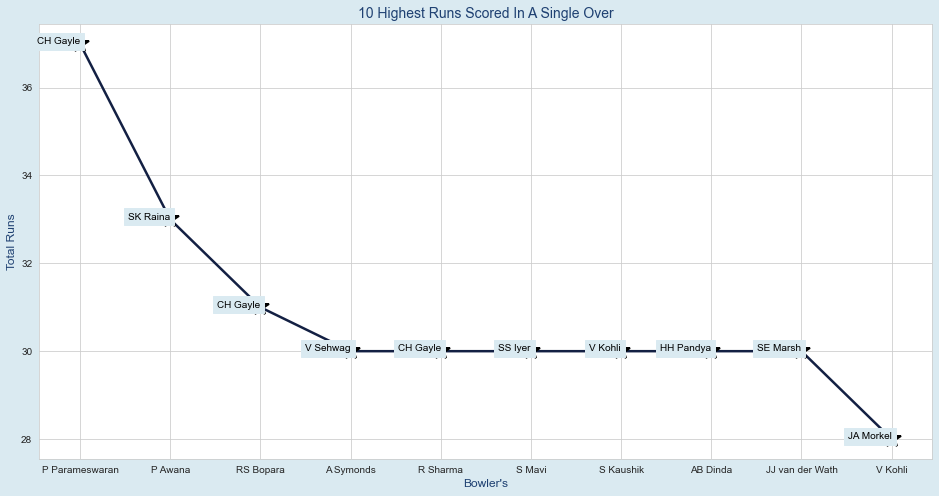

In [850]:
# 10 Highest Number Of Runs Scored In A Single Over.

Data_Filtered = ball.groupby(['match_id','inning','over','bowler','batsman'])['total_runs'].sum().reset_index()

Highest_Runs = Data_Filtered.sort_values(ascending=False,by='total_runs').head(10)

plt.figure(figsize=(16,8),facecolor='#DAEAF1')

plt.plot(Highest_Runs['bowler'],Highest_Runs['total_runs'],linewidth=2.5,color='#132043',
         marker='*',markersize=18,markeredgecolor='#000000',markeredgewidth=2)

plt.xlabel("Bowler's",color='#1F4172',size=12)
plt.ylabel("Total Runs",color='#1F4172',size=12)
plt.title("10 Highest Runs Scored In A Single Over",color='#1F4172',size=14)


# Text on Graph
for x, y, batsman in zip(Highest_Runs['bowler'], Highest_Runs['total_runs'], Highest_Runs['batsman']):
    plt.text(x, y, batsman, ha='right', va='baseline', fontsize=10, color='black',backgroundcolor='#DAEAF1')

plt.show()


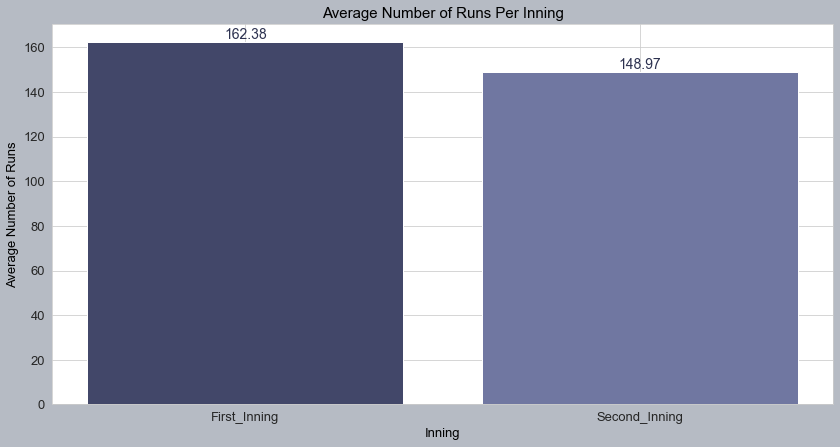

In [938]:
# Average Number Of Runs Per Inning.

First_Inning = ball[ball['inning'] == 1]
Second_Inning = ball[ball['inning'] == 2]

First_Inning_Avg_Runs = First_Inning.groupby('match_id')['total_runs'].sum().mean()
Second_Inning_Avg_Runs = Second_Inning.groupby('match_id')['total_runs'].sum().mean()

Innings = ['First_Inning' , 'Second_Inning']
Avg_Runs = [First_Inning_Avg_Runs , Second_Inning_Avg_Runs]

plt.figure(figsize=(14,7),facecolor='#B6BBC4')
plt.bar(Innings,Avg_Runs,color = ['#424769','#7077A1'])

# Add labels and title
plt.xlabel('Inning', color='black', size=13)
plt.ylabel('Average Number of Runs', color='black', size=13)
plt.title('Average Number of Runs Per Inning', color='black', size=15)

# Change the size of the ticks on x-axis and y-axis
plt.tick_params(axis='x',labelsize=13)
plt.tick_params(axis='y',labelsize=13)


# Display the values on top of the bars
for i, v in enumerate(avg_runs):
    plt.text(i, v + 0.1, f'{v:.2f}',size=14 ,ha='center', va='bottom', color='#2D3250')
    
plt.show()


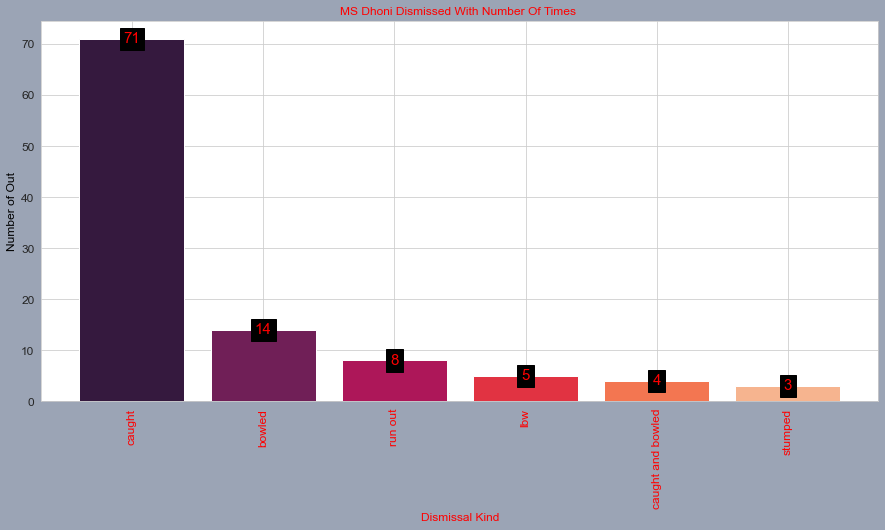

In [1031]:
# Specific Batsman Dismissal Types With Number Of Times In IPL.

plt.figure(figsize=(15,7),facecolor = '#9BA4B5')

ball['No. of Times'] = 1 

Temp_df = ball[~ball['dismissal_kind'].isnull()]

Data_Filter = Temp_df.groupby(['player_dismissed','dismissal_kind'])['No. of Times'].count().reset_index()

Dismissal_Types = Data_Filter.sort_values(ascending=False,by='No. of Times')

colors = sns.color_palette('rocket')

# Function to print batsman dismissed history in IPL 
def player_dismissed(Batsman):
    
    Batsman_History = Dismissal_Types[Dismissal_Types['player_dismissed'] == Batsman]
    
    plt.bar(Batsman_History['dismissal_kind'],Batsman_History['No. of Times'],color = colors)
    

    plt.xlabel('Dismissal Kind',color = 'red',size = 12)
    plt.ylabel('Number of Out',color = 'black',size = 12)
    plt.title(f'{Batsman} Dismissed With Number Of Times ',size = 12,color = 'red')
    plt.xticks(rotation=90)
    
    # Change The x-axis color and size 
    plt.tick_params(axis='x',colors = 'red',labelsize = 12)
    plt.tick_params(axis='y',labelsize = 12)
    
    # Display the values on top of the bars
    for index,value in enumerate(Batsman_History['No. of Times']):
        plt.text(index,value,str(value),ha='center',va='center',size=15,color='red',backgroundcolor='#000000')
    
    
# User input for Batsman Name     
# Batsman_Name = input("Enter the Batsman Name: ")
Batsman_Name = 'MS Dhoni'

player_dismissed(Batsman_Name)
    


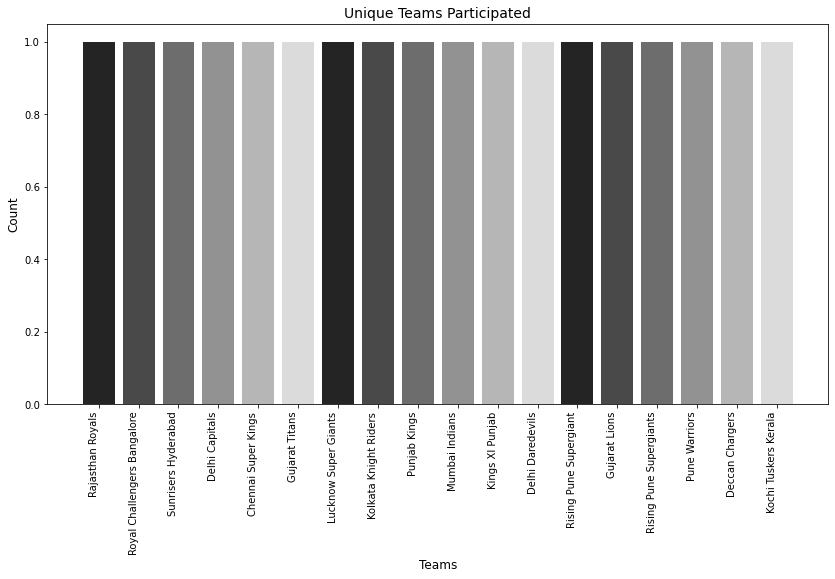

In [148]:
# How Many Unique Teams Participated.

unique_teams = ipl['Team1'].unique()

colors = sns.color_palette('gist_gray')

# Plotting the unique teams
plt.figure(figsize=(14, 7))
plt.bar(unique_teams, height=1, color=colors)  
plt.xlabel('Teams', size=12)
plt.ylabel('Count', size=12)
plt.title('Unique Teams Participated', size=14)
plt.xticks(rotation=90, ha='right')  # Adjust rotation for better visibility

plt.show()


# Nahi Hua

In [191]:
# Find The Team With The Most Consecutive Wins.

ipl


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,No. of Matches,No. of Times
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,1
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,1,1
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,1,1
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,1,1
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,1,1
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,1,1
947,335984,Delhi,2008-04-19,2008,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,1,1
948,335983,Chandigarh,2008-04-19,2008,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,1,1


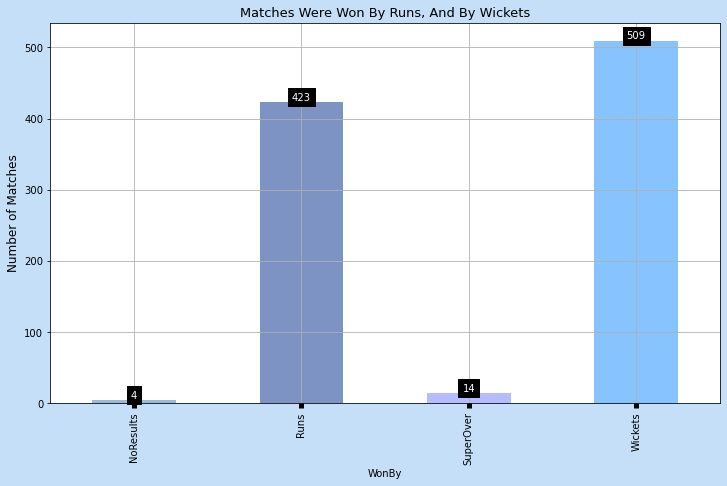

In [193]:
# How Many Matches Were Won By Runs, And How Many By Wickets.

ipl['No. of Matches'] = 1

matches_count = ipl.groupby('WonBy')['No. of Matches'].count()

plt.figure(figsize=(12,7),facecolor='#C5DFF8')

Bar_Chart = ipl.groupby('WonBy')['No. of Matches'].count().plot(kind='bar',
                        color = ['#9EB8D9','#7C93C3','#B4BDFF','#87C4FF'])

Bar_Chart

plt.tick_params(axis='x',labelsize=10,width=5,size=5)
plt.ylabel('Number of Matches',size=12)
plt.title('Matches Were Won By Runs, And By Wickets',size=13)
plt.grid()

# Display values on Graph 
for index, value in enumerate(matches_count):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='white',backgroundcolor='black')

plt.show()


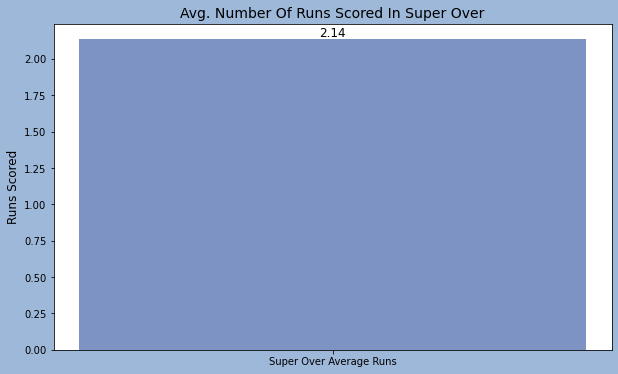

In [75]:
# Avg. Number Of Runs Scored In Super Over.

plt.figure(figsize=(10,6),facecolor='#9EB8D9')

counts = ball[ball['is_super_over'] == 1]['total_runs'].count()

Super_Over_Avg_Runs = ball[ball['is_super_over'] == 1]['total_runs'].sum() / counts

x_axis = 'Super Over Average Runs'
y_axis = Super_Over_Avg_Runs

plt.bar(x_axis,y_axis,color='#7C93C3')

plt.ylabel('Runs Scored',size=12)
plt.title('Avg. Number Of Runs Scored In Super Over',size=14)

# Display value on Graph
plt.text('Super Over Average Runs', avg_runs_super_over, f'{avg_runs_super_over:.2f}',
         ha='center', va='bottom', color='black', size=12)

plt.show()


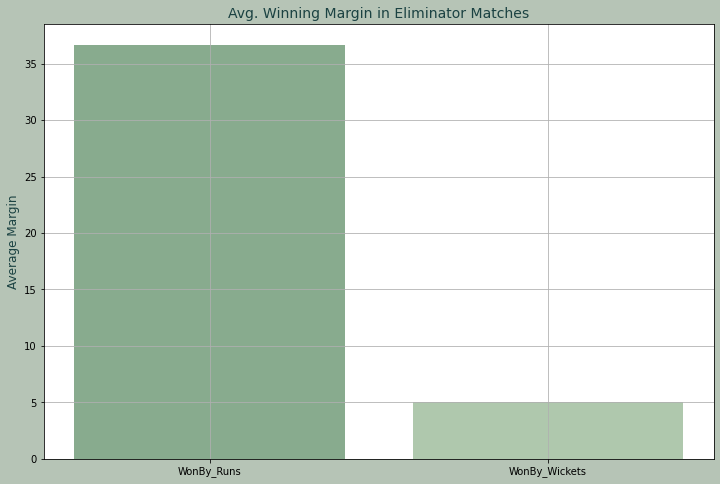

In [30]:
# Avg. Winning Margin in Eliminator Matches.

plt.figure(figsize=(12,8),facecolor='#B6C4B6')

Eliminator_Matches = ipl[ipl['MatchNumber'] == 'Eliminator']

Runs_Count = Eliminator_Matches[Eliminator_Matches['WonBy'] == 'Runs']['Margin'].count()
Wickets_Count = Eliminator_Matches[Eliminator_Matches['WonBy'] == 'Wickets']['Margin'].count()


WonBy_Runs = Eliminator_Matches[Eliminator_Matches['WonBy'] == 'Runs']['Margin'].sum() / Runs_Count
WonBy_Wickets = Eliminator_Matches[Eliminator_Matches['WonBy'] == 'Wickets']['Margin'].sum() / Wickets_Count

x_axis = ['WonBy_Runs' , 'WonBy_Wickets']
y_axis = [WonBy_Runs , WonBy_Wickets]


plt.bar(x_axis,y_axis,color = ['#88AB8E','#AFC8AD'])

plt.ylabel('Average Margin',size=12,color='#1B4242')
plt.title('Avg. Winning Margin in Eliminator Matches',size=14,color='#1B4242')
plt.grid()

plt.show()


In [119]:
# Three Empires With The Most Appereance.

Umpire1 = ipl['Umpire1'].value_counts().reset_index()
Umpire2 = ipl['Umpire2'].value_counts().reset_index()


# Merge the two DataFrames on the "index" column
combined_umpires = pd.merge(Umpire1, Umpire2, how='outer', left_on='index', right_on='index')

# Rename columns for clarity
combined_umpires.columns = ['Umpire', 'Count_Umpire1', 'Count_Umpire2']

# Fill NaN values with 0
combined_umpires = combined_umpires.fillna(0)

# Create a new column with the total count of appearances
combined_umpires['Total_Appearances'] = combined_umpires['Count_Umpire1'] + combined_umpires['Count_Umpire2']

# Sort the DataFrame by the total count in descending order
combined_umpires = combined_umpires.sort_values(by='Total_Appearances', ascending=False)

# Select the top three umpires
top_three_umpires = combined_umpires.head(3)

Empires_Appereance = pd.DataFrame(top_three_umpires)

Empires_Appereance


,Umpire,Count_Umpire1,Count_Umpire2,Total_Appearances
3,S Ravi,48.0,83.0,131.0
0,AK Chaudhary,95.0,16.0,111.0
1,HDPK Dharmasena,76.0,18.0,94.0


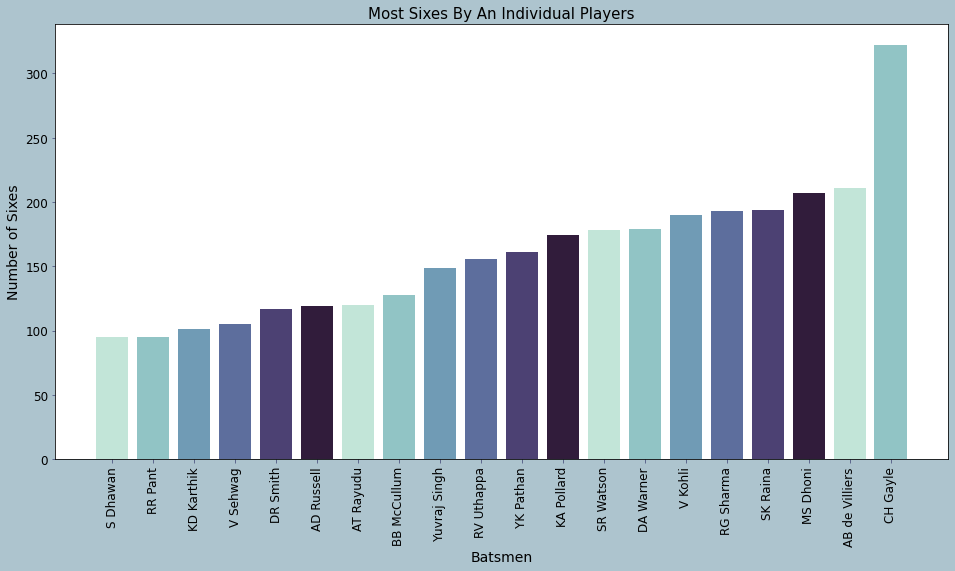

In [214]:
# Most Sixes In IPL By Individual Players.

ball['No. of Times'] = 1


plt.figure(figsize=(16,8),facecolor='#ADC4CE')

colors = sns.cubehelix_palette(start=.5, rot=-.5)

Filter_Data = ball[ball['total_runs'] == 6]

Most_Sixes = Filter_Data.groupby('batsman')['No. of Times'].sum().sort_values().reset_index().tail(20)

plt.bar(Most_Sixes['batsman'],Most_Sixes['No. of Times'],color=colors)

plt.xlabel('Batsmen',size=14)
plt.ylabel('Number of Sixes',size=14)
plt.title('Most Sixes By An Individual Players',size=15)
plt.xticks(rotation=90)

plt.tick_params(axis='x',labelsize=12,color='#4B527E')
plt.tick_params(axis='y',labelsize=12,color='#4B527E')

plt.show()


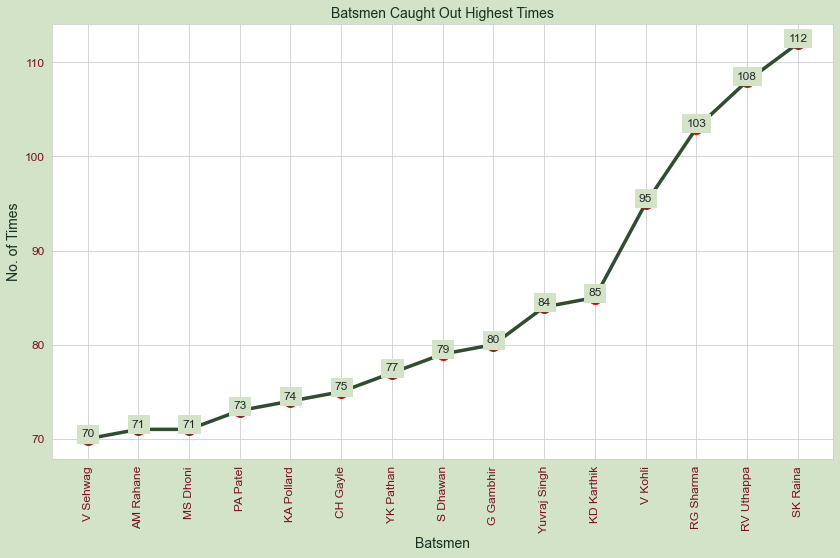

In [1162]:
# 15 Player Highest Time Caught Out 

ball['No. of Times'] = 1

Data_Manage = ball[ball['dismissal_kind'] == 'caught']

Caught_Out = Data_Manage.groupby('batsman')['No. of Times'].count().sort_values().reset_index().tail(15)

plt.figure(figsize=(14,8),facecolor='#D2E3C8')

plt.plot(Caught_Out['batsman'],Caught_Out['No. of Times'],color='#304D30',linewidth=3.5,
        marker='o',markersize=12,markeredgecolor='red')

plt.xlabel('Batsmen',color='#163020',size=14)
plt.ylabel('No. of Times',color='#163020',size=14)
plt.title('Batsmen Caught Out Highest Times',color='#163020',size=14)
plt.xticks(rotation = 90)

plt.tick_params(axis='x',labelsize=12,labelcolor='#750E21')
plt.tick_params(axis='y',labelsize=12,labelcolor='#750E21')

# Display Vlaue on Graph
for index,value in enumerate(Caught_Out['No. of Times']):
    plt.text(index,value,str(value),size=12,ha='center',va='bottom',backgroundcolor='#D2E3C8')

plt.show()


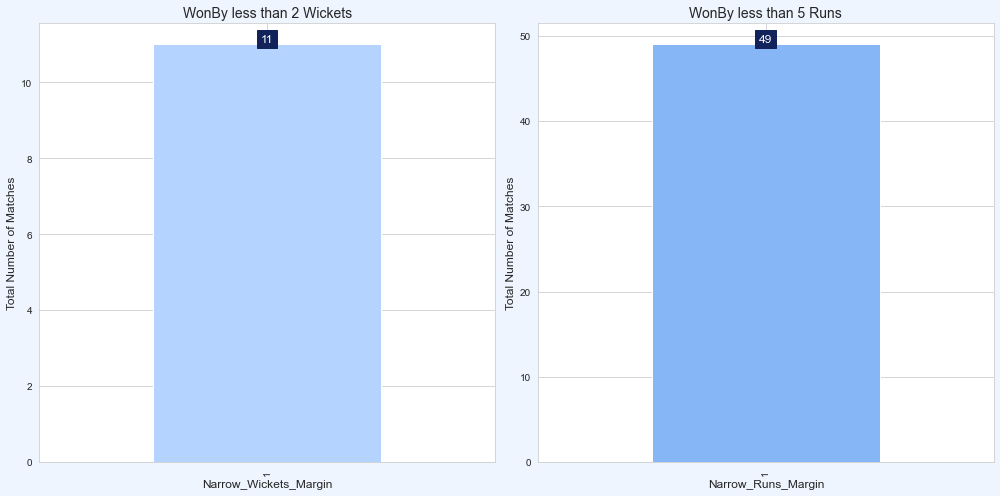

In [1099]:
# Matches That Were Decided By A Narrow Margin(Less Than 5 Runs or 2 Wickets).

ipl['No. of Matches'] = 1

WonBy_Wickets = ipl[ipl['WonBy'] == 'Wickets']
WonBy_Runs = ipl[ipl['WonBy'] == 'Runs']

# WonBy Wickets 
Narrow_Wickets_Margin = WonBy_Wickets[WonBy_Wickets['Margin'] <= 2]['No. of Matches'].value_counts()
# WonBy Runs
Narrow_Runs_Margin = WonBy_Runs[WonBy_Runs['Margin'] <= 5]['No. of Matches'].value_counts()


# Set Figure of the Graph
plt.figure(figsize=(14,7),facecolor='#EEF5FF')

# 1st Subplot 
plt.subplot(1,2,1)
Narrow_Wickets_Margin.plot(kind='bar',color='#B4D4FF')
plt.xlabel('Narrow_Wickets_Margin',size=12)
plt.ylabel('Total Number of Matches',size=12)
plt.title('WonBy less than 2 Wickets',size=14)

# Display the values on top of the bars
for i,x in enumerate(Narrow_Wickets_Margin):
    plt.text(i,x,str(x),size=12,ha='center',backgroundcolor='#11235A',va='bottom',color='white')

# 2nd Subplot 
plt.subplot(1,2,2)
Narrow_Runs_Margin.plot(kind='bar',color='#86B6F6')
plt.xlabel('Narrow_Runs_Margin',size=12)
plt.ylabel('Total Number of Matches',size=12)
plt.title('WonBy less than 5 Runs',size=14)

# Display the values on top of the bars
for i,x in enumerate(Narrow_Runs_Margin):
    plt.text(i,x,str(x),size=12,ha='center',backgroundcolor='#11235A',va='bottom',color='white')


plt.tight_layout()
plt.show()


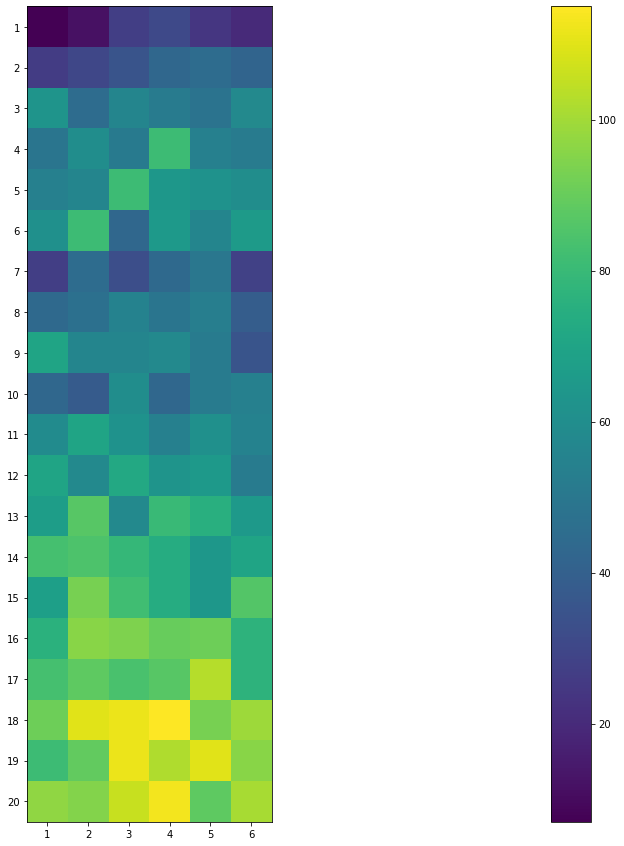

In [124]:
# Sixes Heatmap

Filter = ball[ball['ball'].isin([1,2,3,4,5,6])]

Only_Sixes = Filter[(Filter['total_runs'] == 6) & (Filter['batsman_runs'] == 6)]
Sixes_DataFrame = Only_Sixes.pivot_table(index = 'over', columns = 'ball', values = 'batsman_runs',aggfunc = 'count')

plt.figure(figsize=(100,15))

plt.imshow(Sixes_DataFrame,cmap = 'viridis')


plt.xticks(range(6), [1, 2, 3, 4, 5, 6])  
plt.yticks(range(20), range(1, 21))  

plt.colorbar()
